### Steps
<ol>
<li>Data Preparation</li>
    <ol>
        <li>Data Exporation</li>
        <li>Data cleaning</li>
        <li>Data Transform</li>
    </ol>
<li>Model Training</li>
<li>Model Tuning</li> 
<li>Model Evaluation</li>
<li>Making Predictions</li>
</ol>

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing  import LabelEncoder


### Data Exploration

In [2]:
# Read in the data
main_df = pd.read_csv('sf_house_rent_pricesCopy.csv')
main_df.head(10)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600,2,2.0,in-unit,no pets,multi,protected,7
1,3500,550,1,1.0,in-unit,both,multi,protected,7
2,5100,1300,2,1.0,in-unit,both,multi,no parking,7
3,9000,3500,3,2.5,in-unit,no pets,multi,protected,7
4,3100,561,1,1.0,no laundry,both,multi,no parking,7
5,3800,800,2,1.0,on-site,cats,multi,protected,9
6,3100,750,1,1.0,in-unit,no pets,multi,protected,8
7,3000,650,1,1.0,on-site,both,multi,no parking,7
8,3000,650,1,1.0,on-site,both,multi,protected,7
9,3200,650,1,1.0,in-unit,cats,multi,protected,9


In [3]:
# preview the data
main_df.tail(10)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
979,4700,1750,2,2.0,in-unit,no pets,multi,protected,9
980,4700,1750,2,2.0,in-unit,no pets,multi,protected,9
981,2000,500,0,1.0,on-site,no pets,multi,off-street,4
982,2700,600,1,1.0,on-site,cats,multi,protected,1
983,4099,1300,3,1.0,no laundry,both,multi,no parking,5
984,3595,1200,2,1.0,on-site,cats,multi,no parking,9
985,4695,1700,3,2.0,in-unit,no pets,multi,no parking,7
986,1950,450,1,1.0,no laundry,no pets,single,off-street,3
987,3600,1100,3,1.0,in-unit,no pets,multi,no parking,8
988,3625,1032,2,2.0,in-unit,no pets,multi,protected,8


In [4]:
# preview the data

main_df.sample(10)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
249,4395,1035,2,2.0,in-unit,both,multi,no parking,6
927,12000,3300,4,4.0,in-unit,both,multi,protected,9
856,3000,845,1,1.0,on-site,no pets,multi,protected,6
831,4400,1900,2,2.0,in-unit,no pets,single,protected,1
398,3995,933,2,2.0,in-unit,both,multi,no parking,9
788,2199,575,1,1.0,on-site,both,multi,no parking,2
378,2800,950,2,1.0,on-site,no pets,multi,no parking,7
955,2420,729,1,1.0,no laundry,cats,single,no parking,3
352,2795,950,1,1.0,on-site,both,multi,no parking,8
696,2700,660,1,1.0,in-unit,no pets,multi,no parking,8


In [5]:
# statistical summary of the data
main_df.describe()

,price,sqft,beds,bath,hood_district
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293,7.052578
std,1546.222670,474.629798,1.076710,0.562714,2.404716
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4242.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


In [6]:
# understanding the data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    int64  
 2   beds           989 non-null    int64  
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
# check the data types
main_df.dtypes

price              int64
sqft               int64
beds               int64
bath             float64
laundry           object
pets              object
housing_type      object
parking           object
hood_district      int64
dtype: object

In [8]:
# checking the shape  of the dataset
main_df.shape

(989, 9)

In [9]:
# checking columns
main_df.columns

Index(['price', 'sqft', 'beds', 'bath', 'laundry', 'pets', 'housing_type',
       'parking', 'hood_district'],
      dtype='object')

<H1>Data Cleaning</H1>

### Checking for completeness 

In [10]:
# checking for missing values
main_df.isna().sum()

price            0
sqft             0
beds             0
bath             0
laundry          0
pets             0
housing_type     0
parking          0
hood_district    0
dtype: int64

###  Checking for consistency

In [11]:
# checking for duplicates
main_df.duplicated().sum()

28

In [12]:
# dealing with duplicates
main_df.drop_duplicates(inplace=True)

In [13]:
main_df.duplicated().sum()

0

In [14]:
main_df.shape

(961, 9)

In [15]:
main_df.price.value_counts()

4500    28
3000    21
3995    20
3500    20
2800    19
        ..
4675     1
2517     1
6999     1
2880     1
4099     1
Name: price, Length: 369, dtype: int64

In [16]:
main_df.dtypes

price              int64
sqft               int64
beds               int64
bath             float64
laundry           object
pets              object
housing_type      object
parking           object
hood_district      int64
dtype: object

In [17]:
# creating a dataset to be used for visualization  
visual_df = main_df.copy()

In [18]:
main_df.groupby('hood_district').mean()

,price,sqft,beds,bath
hood_district,,,,
1,3453.833333,1043.416667,1.854167,1.406250
2,2950.725490,872.588235,1.647059,1.284314
3,2825.000000,871.571429,1.857143,1.357143
4,4731.272727,1484.818182,2.363636,1.863636
5,3938.611650,1057.407767,2.038835,1.383495
6,3671.918033,955.672131,1.836066,1.393443
7,4092.390244,1107.804878,1.845528,1.406504
8,3250.984536,848.835052,1.422680,1.239691
9,3720.836420,977.500000,1.601852,1.469136


In [19]:
main_df.sample(10)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
624,1980,572,1,1.0,in-unit,both,multi,protected,10
845,1595,420,0,1.0,no laundry,no pets,multi,no parking,8
128,2800,675,2,1.0,no laundry,no pets,multi,no parking,8
603,3895,950,2,1.0,on-site,both,multi,no parking,1
5,3800,800,2,1.0,on-site,cats,multi,protected,9
378,2800,950,2,1.0,on-site,no pets,multi,no parking,7
283,1800,450,1,1.0,no laundry,no pets,multi,off-street,3
748,1895,500,1,1.0,in-unit,no pets,multi,no parking,10
669,1749,260,0,1.0,on-site,no pets,multi,no parking,8
3,9000,3500,3,2.5,in-unit,no pets,multi,protected,7


In [20]:
main_df.columns

Index(['price', 'sqft', 'beds', 'bath', 'laundry', 'pets', 'housing_type',
       'parking', 'hood_district'],
      dtype='object')

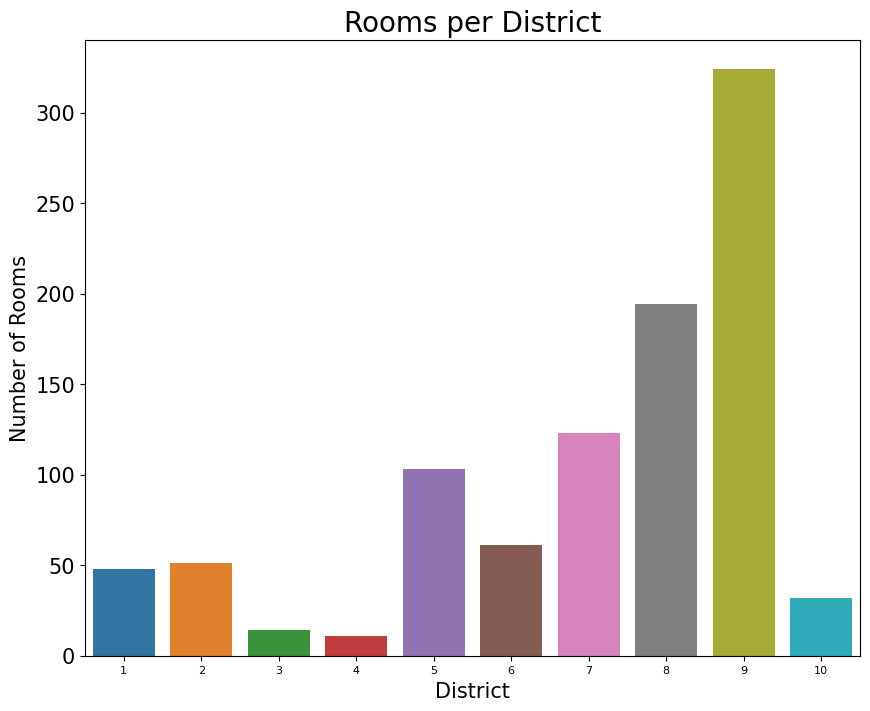

<Figure size 640x480 with 0 Axes>

In [21]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(x = visual_df['hood_district'],ax=ax)
plt.title('Rooms per District',fontsize=20)
plt.xlabel('District',fontsize=15)
plt.ylabel('Number of Rooms',fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)
plt.show()
plt.savefig('RoomsPerDistrict.png')

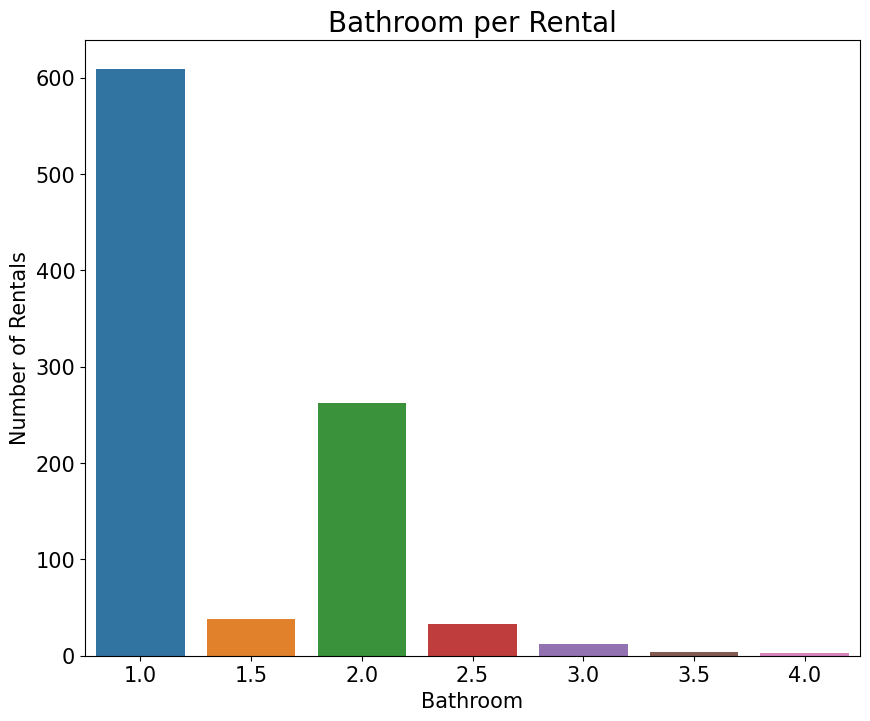

<Figure size 640x480 with 0 Axes>

In [22]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(x = visual_df['bath'],ax=ax)
plt.title('Bathroom per Rental',fontsize=20)
plt.xlabel('Bathroom',fontsize=15)
plt.ylabel('Number of Rentals',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig('BathroomperRental.png')

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'bath'}>],
       [<AxesSubplot:title={'center':'hood_district'}>, <AxesSubplot:>]],
      dtype=object)

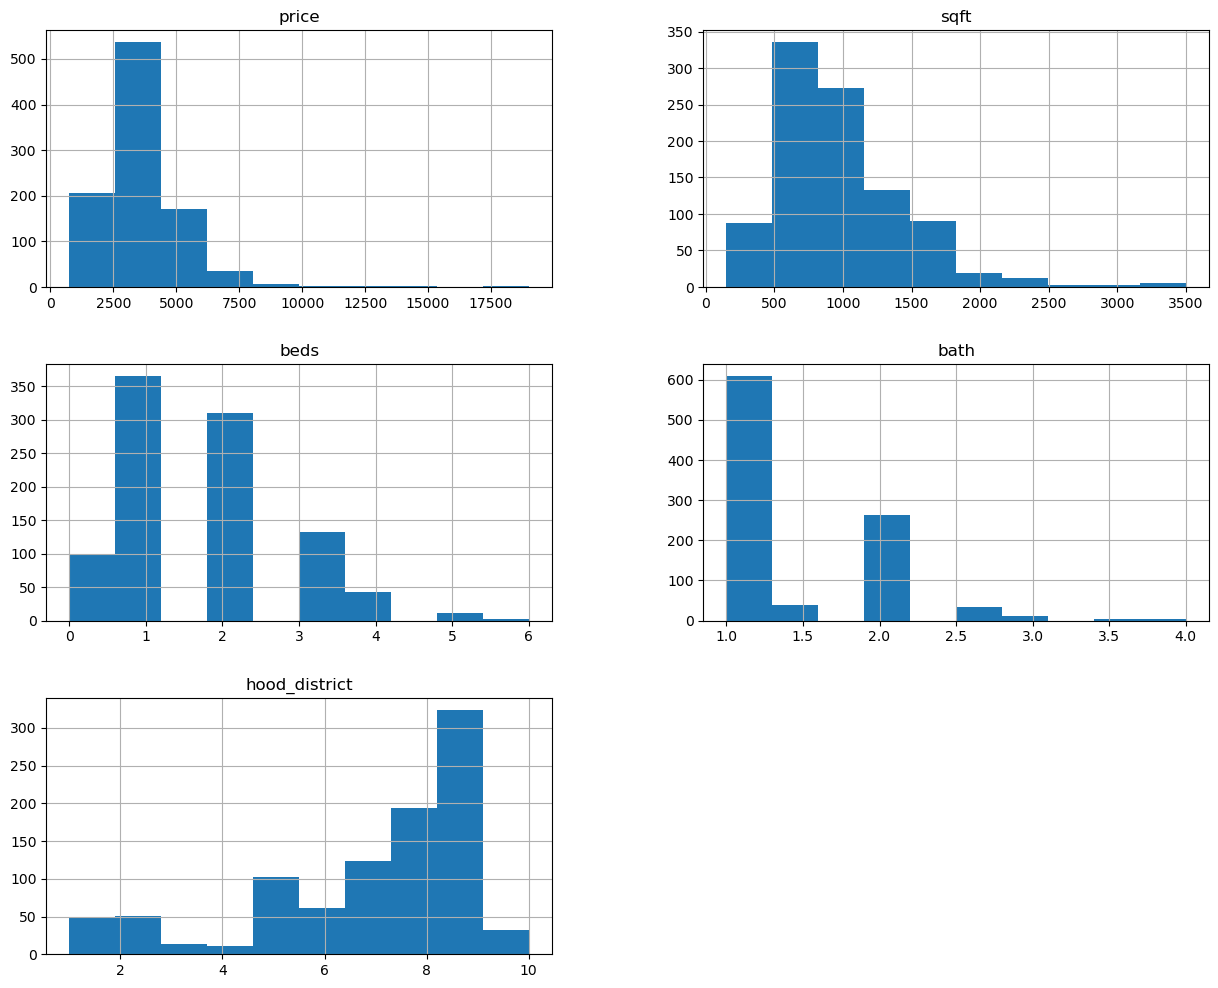

In [23]:
# checking the distribution of the data
main_df.hist(figsize=(15,12))

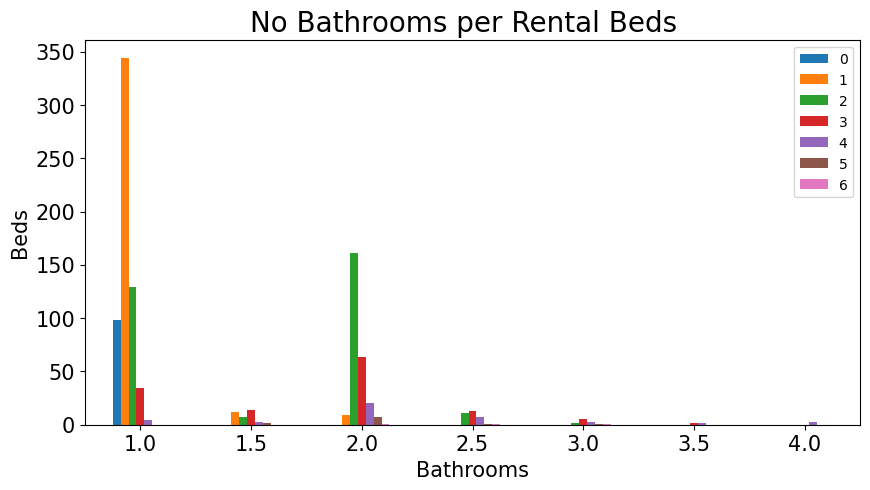

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.crosstab(visual_df.bath,visual_df.beds).plot(kind='bar',ax=ax).legend()
plt.title('No Bathrooms per Rental Beds  ',fontsize=20)
plt.xlabel('Bathrooms',fontsize=15)
plt.ylabel('Beds',fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('BedsVsBath.png')

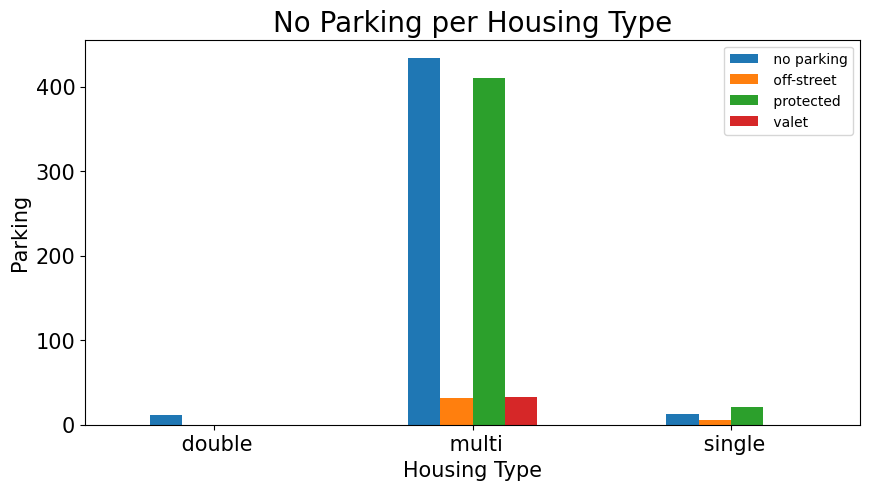

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.crosstab(visual_df.housing_type,visual_df.parking).plot(kind='bar',ax=ax).legend()
plt.title('No Parking per Housing Type',fontsize=20)
plt.xlabel('Housing Type',fontsize=15)
plt.ylabel('Parking',fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('HousingTypeVsParking.png')

C:\Users\Mich\AppData\Local\Temp\ipykernel_9084\369832812.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


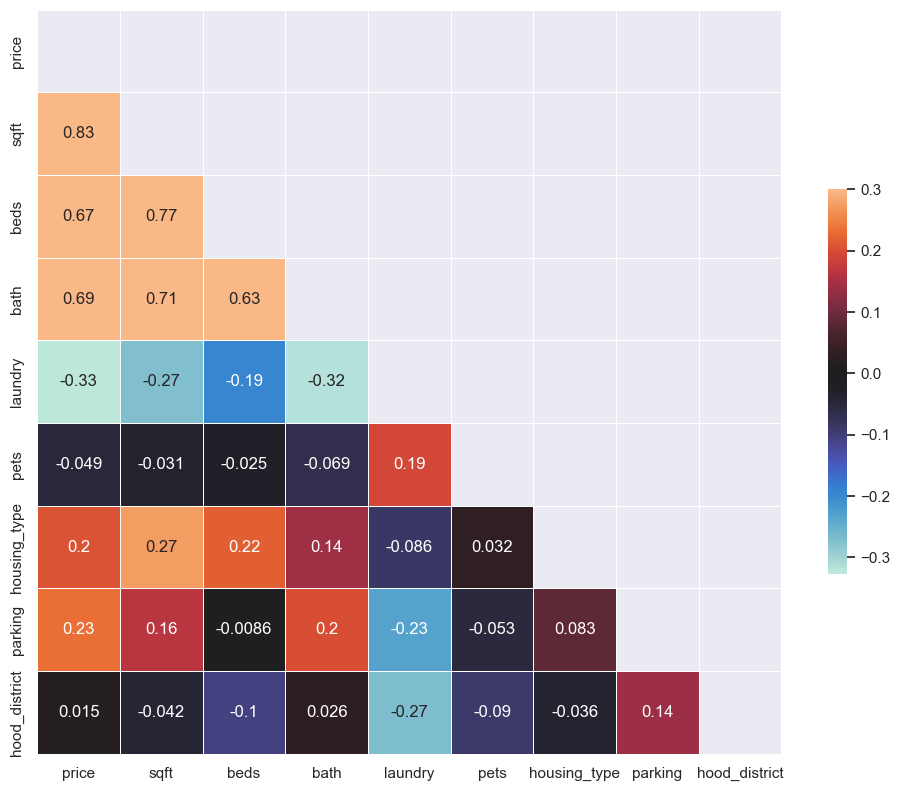

<Figure size 640x480 with 0 Axes>

In [38]:
#checking correlation between features
sns.set(style="darkgrid")


corr = main_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vf, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()
plt.savefig('Correlation.png')

<H1>Data Cleaning</H1>

### Checking for completeness 

In [26]:
# checking for missing values
main_df.isna().sum()

price            0
sqft             0
beds             0
bath             0
laundry          0
pets             0
housing_type     0
parking          0
hood_district    0
dtype: int64

### Checking for consistency

In [27]:
main_df.shape

(961, 9)

In [28]:
# checking for duplicates
main_df.duplicated().sum()

0

In [29]:
# dropping duplicates
main_df.drop_duplicates(inplace=True)

In [30]:
main_df.shape

(961, 9)

### Data Transform

In [31]:
number=LabelEncoder()
main_df['laundry']=number.fit_transform(main_df.laundry)
main_df['pets']=number.fit_transform(main_df.pets)
main_df['housing_type']=number.fit_transform(main_df.housing_type) 
main_df['parking']=number.fit_transform(main_df.parking) 

### Model Training

In [32]:

# splitting the data into train and test
X = main_df.drop('price', axis=1)
y = main_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500, random_state=67)

In [34]:
# Fit the random forest to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=67)

In [35]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [36]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
acc=rf.score(X_test,y_test)
print("Mean Squared Error:", mse) 
print("Accuracy:",acc)
 

Mean Squared Error: 743196.8044943736
Accuracy: 0.7542555642050796


### Making Predictions

In [37]:
new_data = pd.DataFrame({
    'sqft':[1200],
    'beds': [3],
    'bath':[2],
    'laundry': ['in-unit'],
    'pets': ['both'],
    'housing_type': ['multi'],
    'parking': ['single'],
    'hood_district': [1]
    })
new_data['laundry']=number.fit_transform(new_data.laundry)
new_data['pets']=number.fit_transform(new_data.pets)
new_data['housing_type']=number.fit_transform(new_data.housing_type) 
new_data['parking']=number.fit_transform(new_data.parking)
prediction = rf.predict(new_data) 
print("Predicted rent price:", prediction)
 
prediction = rf.predict([[1022,1,3,2,1,3,1,10]]) 
print("Predicted rent price:", prediction)

Predicted rent price: [4383.462]
Predicted rent price: [3395.884]


C:\Users\Mich\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
